In [1]:
import model_loader, pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

c:\Users\yexia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json", "../data/tokenizer_merges.txt")

In [3]:
model_file = "../data/v1-5-pruned-emaonly.ckpt"

In [4]:
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [5]:
# Text to Image
prompt = "A dog running"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

In [6]:
# Image to Image
input_image_path = "../images/image.png"
input_image = Image.open(input_image_path)
strength = 0.8

In [7]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

In [8]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=None,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    tokenizer=tokenizer,
    device=DEVICE,
)

100%|██████████| 300/300 [53:08<00:00, 10.63s/it]   


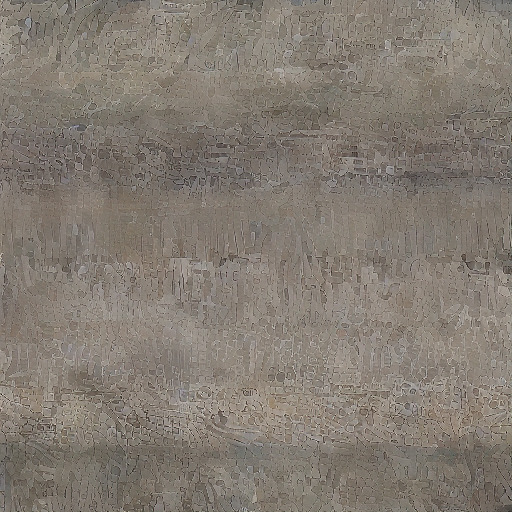

In [9]:
Image.fromarray(output_image)